In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras

2024-04-11 10:09:22.099349: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 10:09:22.479311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 10:09:23.571175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Provided you have internet connection, the dataset can be downloaded by running the cell below, where we make use of the *ucimlrepo* Python package specifically developed for importing datasets from the UC Irvine Machine Learning Repository into scripts and notebooks. Alternatively, you can find the dataset, without any additional information (metadata/further descriptions of variables) at the following link: [<span style="color:light blue; font-weight:bold;">dataset</span>](https://archive.ics.uci.edu/static/public/913/data.csv). For a thorough understanding of the task, you can read moore details on the variables in the dataset here: [<span style="color:light blue; font-weight:bold;">variables detailed description</span>](https://editorapantanal.com.br/journal/index.php/taes/article/view/8/5)

In [2]:
# fetch dataset 
raw_dataset = fetch_ucirepo(id=913)

The dataset as it is will be a special dictionary, of type *ucimlrepo.dotdict.dotdict* containing the dataset as dataframes, as well as metadata about the dataset.

In [3]:
type(raw_dataset)

ucimlrepo.dotdict.dotdict

As per the documentation ([<span style="color:light blue; font-weight:bold;">ucimlrepo docs</span>](https://github.com/uci-ml-repo/ucimlrepo)), the dataset can be accessed through the *data.features* attribute. You can also check the metadata, as well as variables descriptions, through separate accessors.

In [4]:
dataset = raw_dataset.data.features

In [5]:
dataset

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [6]:
raw_dataset.metadata

{'uci_id': 913,
 'name': 'Forty Soybean Cultivars from Subsequent Harvests',
 'repository_url': 'https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests',
 'data_url': 'https://archive.ics.uci.edu/static/public/913/data.csv',
 'abstract': 'Soybean cultivation is one of the most important because it is used in several segments of the food industry. The evaluation of soybean cultivars subject to different planting and harvesting characteristics is an ongoing field of research. We present a dataset obtained from forty soybean cultivars planted in subsequent seasons. The experiment used randomized blocks, arranged in a split-plot scheme, with four replications. The following variables were collected: plant height, insertion of the first pod, number of stems, number of legumes per plant, number of grains per pod, thousand seed weight, and grain yield, resulting in 320 data samples. The dataset presented can be used by researchers from different fields of act

In [7]:
raw_dataset.variables

,name,role,type,demographic,description,units,missing_values
0,Season,Feature,Integer,None,1 or 2,None,no
1,Cultivar,Feature,Categorical,None,Cultivar names,None,no
2,Repetition,Feature,Integer,None,"1, 2, 3 or 4",None,no
3,PH,Feature,Continuous,None,plant height (cm) – determined from the soil s...,cm,no
4,IFP,Feature,Continuous,None,insertion of the first pod (cm) – determined f...,cm,no
5,NLP,Feature,Continuous,None,Number of stems (unit) – through manual counting;,None,no
6,NGP,Feature,Continuous,None,Number of legumes per plant (unit) – through m...,None,no
7,NGL,Feature,Continuous,None,Number of grains per plant (unit) – through ma...,None,no
8,NS,Feature,Continuous,None,Number of grains per pod (unit) – through manu...,None,no
9,MHG,Feature,Continuous,None,Thousand seed weight (g) – according to the me...,g,no


**Preliminary analysis of the dataset**

A high-level description of the numerical columns: basic statistics

In [8]:
dataset.describe()

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


Some more information: data types per column, number of non-null values

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


**Data cleaning**

Confirmation that there are no null values in the dataset

In [10]:
# isnull() returns a Boolean mask - a dataframe with the same dimensions as the initial dataframe
# sum() trats Trues as 1 and False as 0, then sums them up
dataset.isnull().sum()

Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64

We remove duplicate rows, if any.

In [11]:
dataset = dataset.drop_duplicates()

# reset the index after removing duplicates
dataset = dataset.reset_index(drop=True)

There is no ambiguous column - column with data type *object* - except for the "Cultivar" column. We check the type of each elements and count the number of occurences for each type we find. We find that all values are string values. pandas treats them as objects (superclass) for efficiency.

As a double check, we see that all 320 values in the "Cultivar" column are strings.

In [12]:
dataset['Cultivar'].apply(type).value_counts()

Cultivar
<class 'str'>    320
Name: count, dtype: int64

In [13]:
len(dataset["Cultivar"])

320

In [14]:
def outliers_for_column(df, column, k):
    # calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # calculate IQR
    IQR = Q3 - Q1

    # define lower and upper bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers

In [15]:
outliers_for_column(dataset, 'MHG', 1.5)

Series([], Name: MHG, dtype: float64)

As per the documentation of the [<span style="color:light blue; font-weight:bold;">seaborn.boxplot</span>](https://seaborn.pydata.org/generated/seaborn.boxplot.html) method, the whiskers in a box plot is by default computed with parameter whis=1.5, i.e. the k in the function I defined above. It is called Tukey's method. The larger the k parameter, the wider the intervals of whiskers.

I create a boxplot for all numerical values. The 'GY' column has a substantially larger range than the rest of the variables, therefore I display the boxplot for this column separately. 

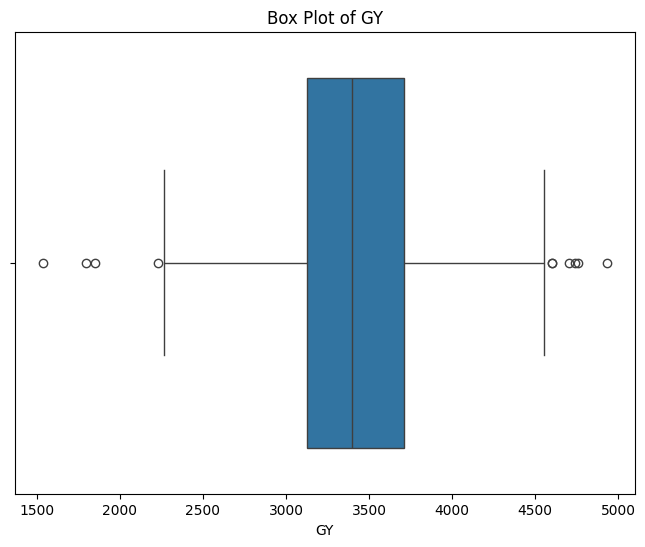

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['GY'])
plt.title('Box Plot of GY')
plt.xlabel('GY')
plt.show()

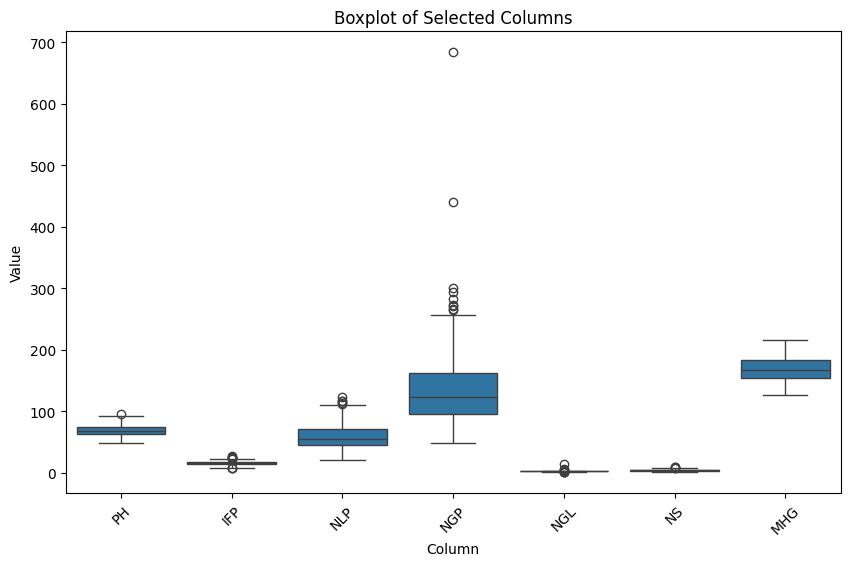

In [17]:
selected_columns = ['PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG']
subset_dataset = dataset[selected_columns]

# Melt the subset DataFrame to convert it to long format
melted_dataset = pd.melt(subset_dataset)

# Create a box plot for the selected columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=melted_dataset)
plt.xticks(rotation=45)
plt.title('Boxplot of Selected Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.show()

Outliers are points below the whiskers of the boxplots. As we can see, there are a few outliers for some variables. We will keep that in mind for later, when we will possibly treat them (we may choose to remove them if that improves accuracy in some models or transform them or not do anything, because they may indicate some rare conditions which can be of interest and some ML algorithms may manage them effectively)

**Correlation matrix**

One way to check if there is any variable determining another variable is to calculate the Pearson correlation coefficient between the target variable and the other numerical variables. A simple way to visualize all pairwise coefficients, we can create a correlation matrix, which is symmetric across the main diagonal, meaning the correlation between variable X and variable Y is the same as the correlation between variable Y and variable X. This coefficient indicates if there is any linear correlation between pairs of variables. For a better understanding, I mapped the correlation matrix to a heatmap, where strong warm colors indicate strong positive linear correlation, whereas deep dark colors represent strong negative linear correlation. Colors close to white/neutral mean weak correlation. For tasks 11 and 12, I plotted 2 correlation matrices for the two target variables (MHG and GY) to easily identify correlations between the variable in focus and the rest of the variables.

In [18]:
variables_MHG = ['MHG', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'GY']
variables_GY = ['GY', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG']

correlation_matrix_MHG = dataset[variables_MHG].corr()
correlation_matrix_GY = dataset[variables_GY].corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix_MHG, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

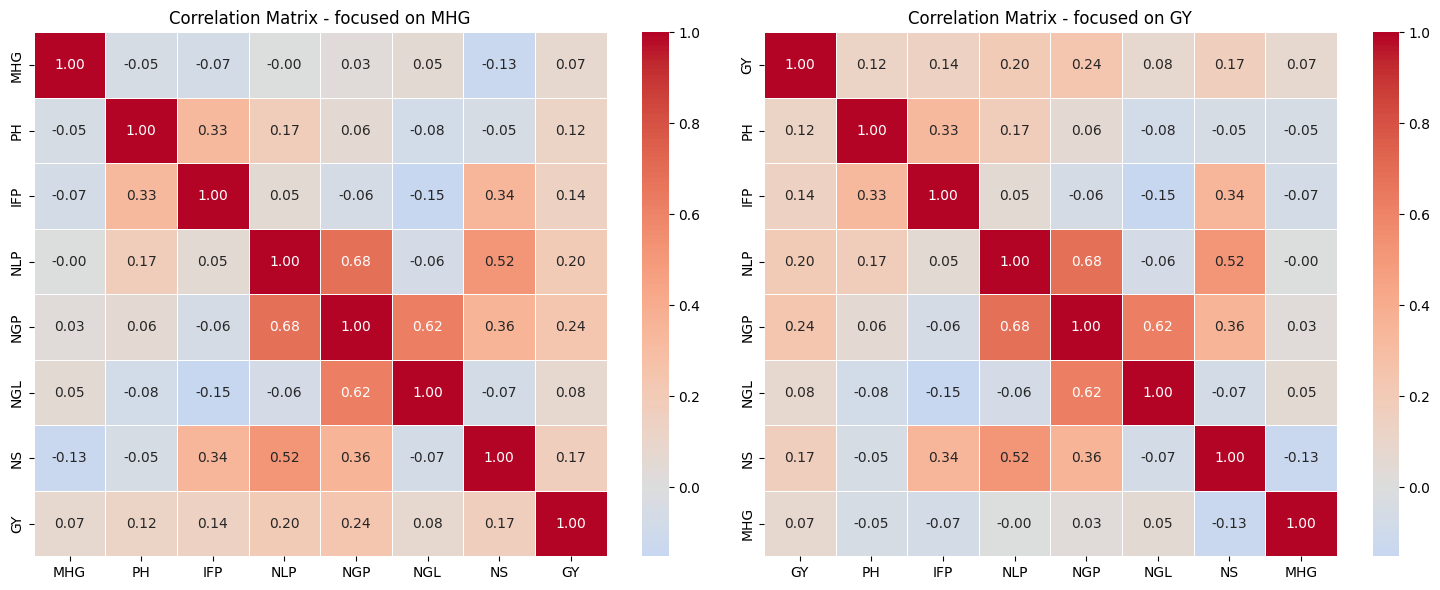

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plot the first heatmap
sns.heatmap(correlation_matrix_MHG, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Matrix - focused on MHG')

# plot the second heatmap
sns.heatmap(correlation_matrix_GY, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Matrix - focused on GY')

# adjust layout to prevent overlapping of labels
plt.tight_layout()

plt.show()

As we can see, there is not really any important linear correlation between the target variables and the rest of the variables. The strongest absolute correlation is between GY and NGP (+0.24), meaning changes in GY indicate changes in NGP in the same direction (increase determines increase) but only in a few cases. We cannot draw the conclusion that these 2 variables are linearly correlated.

Weak linear correlation means that variables are either independent of each other, or they have a non-linear relationship

We will draw a scatterplot for each variable pair to see the shape of the relationship.

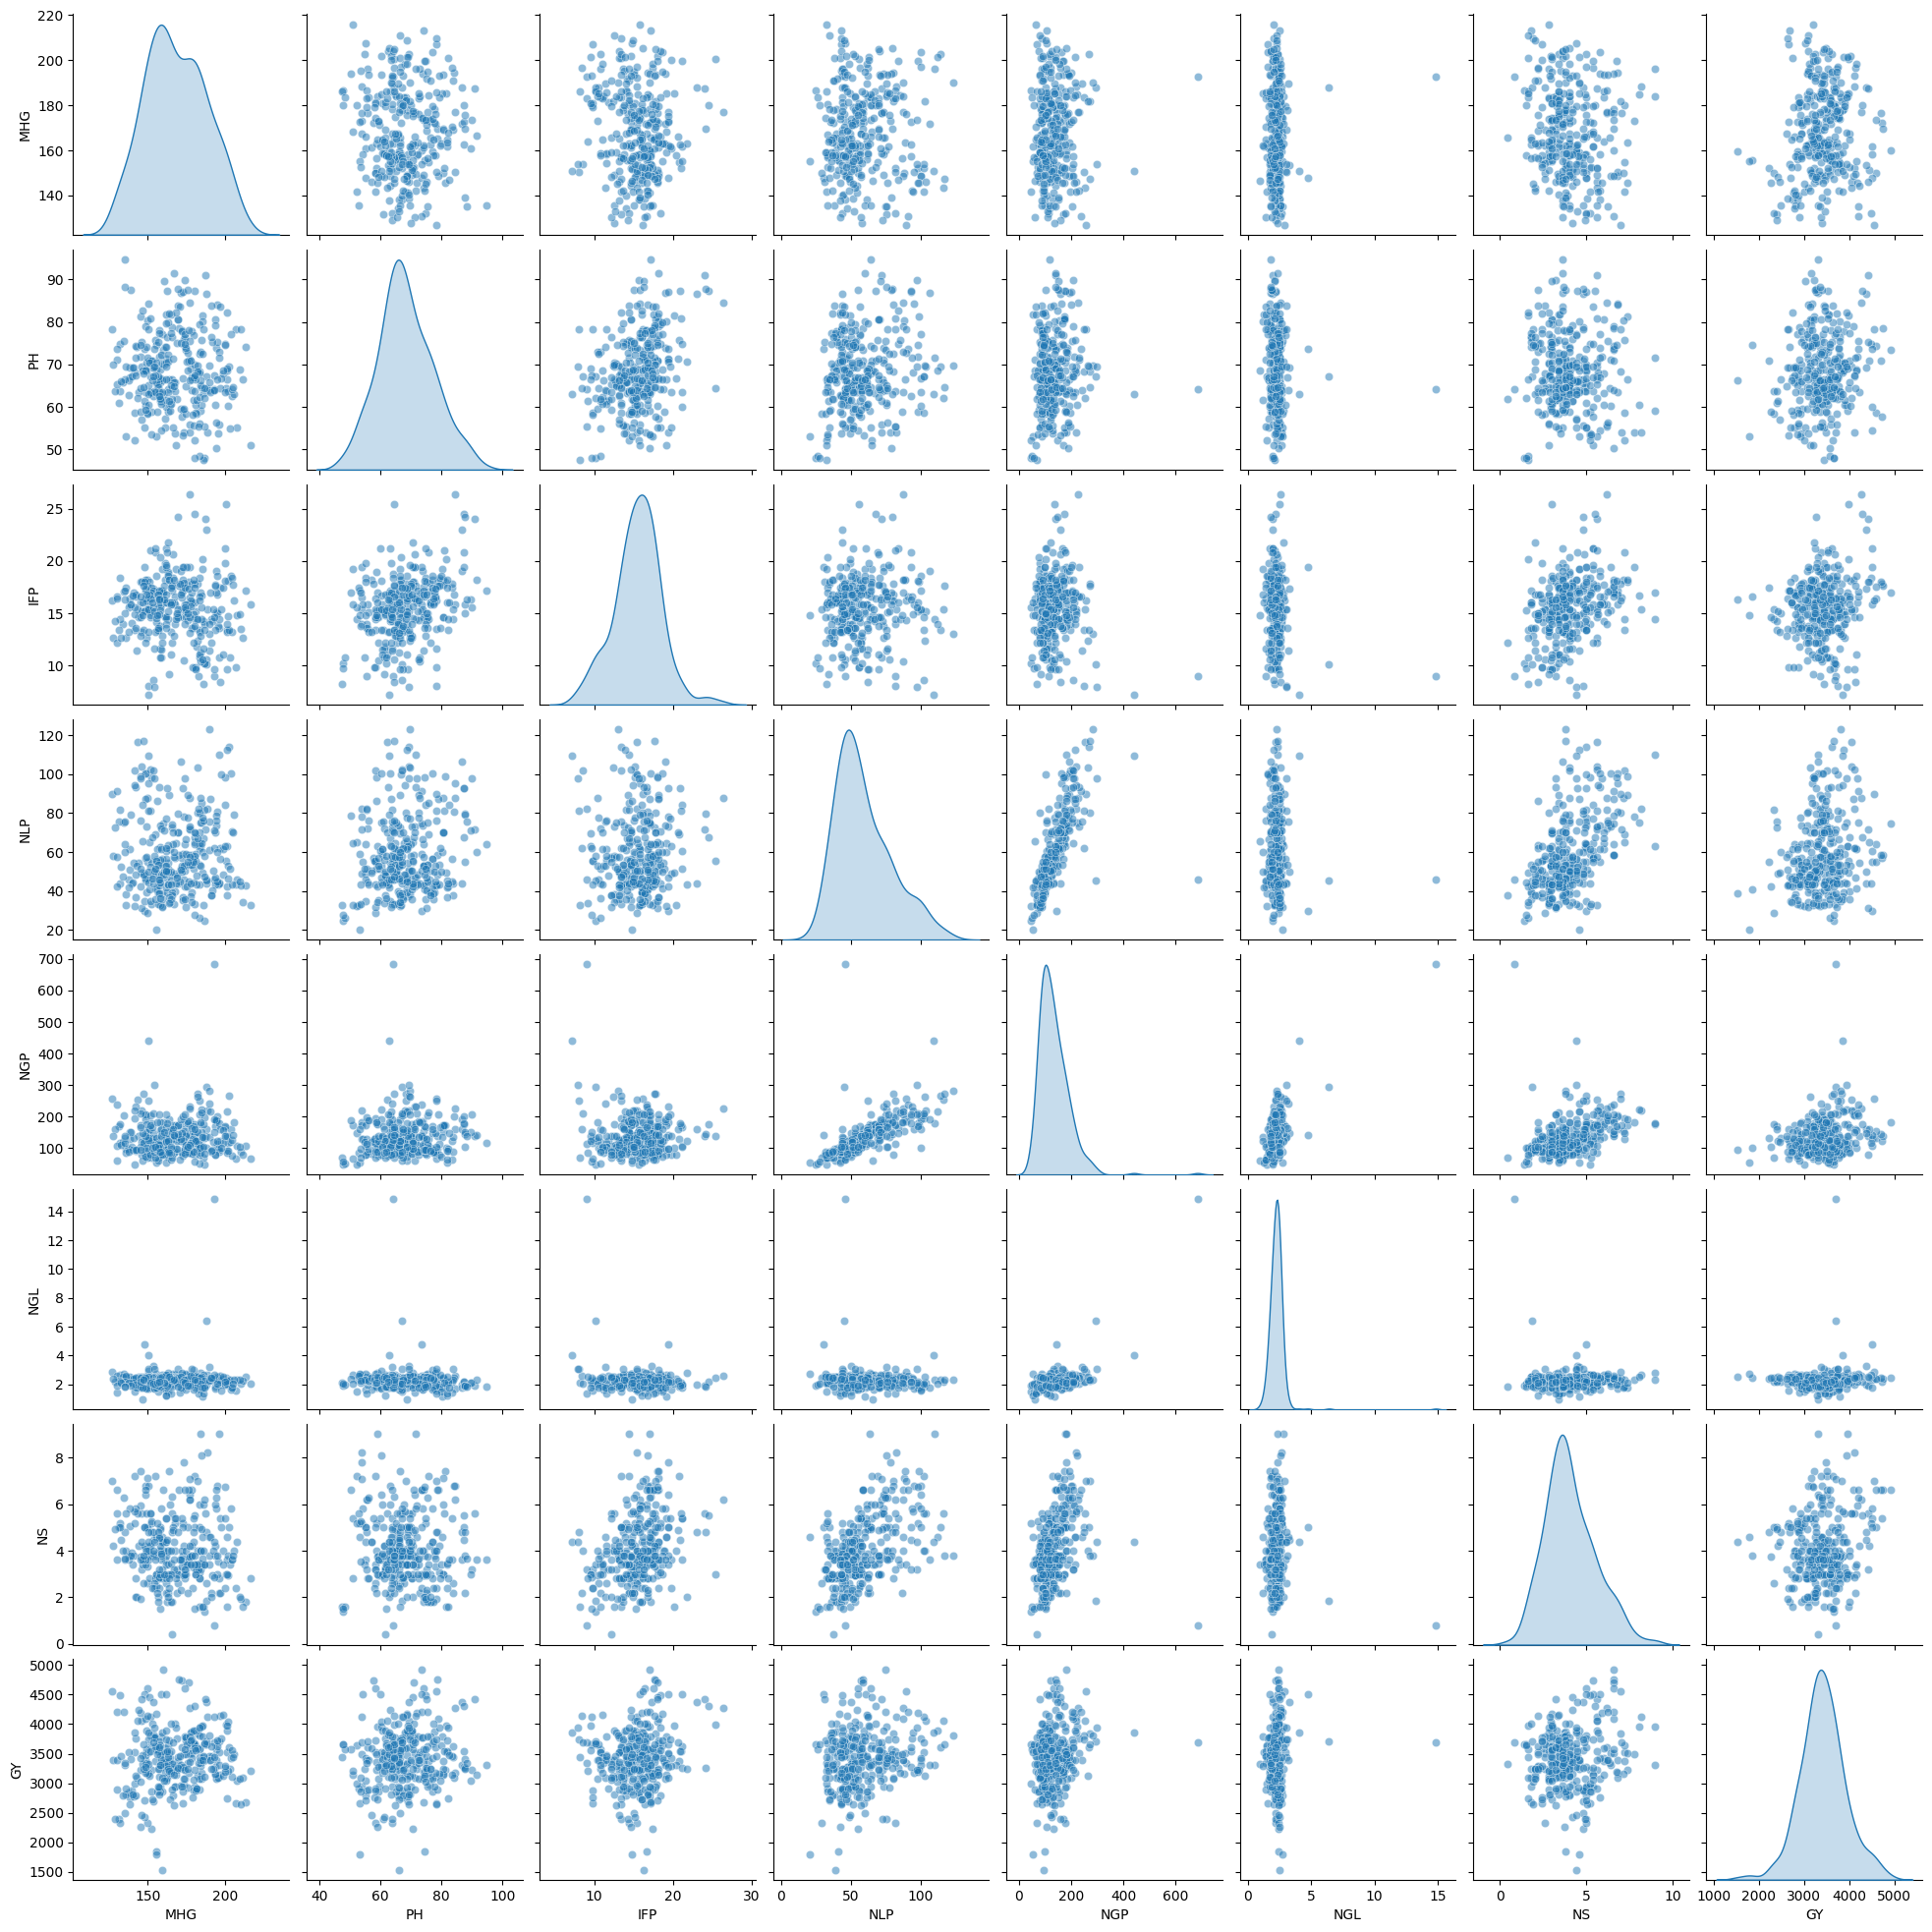

In [20]:
# Selecting numerical variables for scatterplot
numerical_variables = ['MHG', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'GY']

# Plotting pairplot
sns.pairplot(dataset[numerical_variables], diag_kind='kde', markers='o', plot_kws={'alpha':0.5})
plt.show()

---

**Delta in MHG and GY from Season 1 to Season 2**

In [21]:
variables = ['MHG', 'GY']

Here we choose the variable for which we compute the deltas from Season 1 to Season 2.

In [22]:
variable = variables[1]

We make a copy of the initial dataset and remove the columns which are not of interest, i.e. the numerical columns, besides the Season and repetition.

In [23]:
numerical_variables = ['MHG', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'GY']
columns_to_drop = numerical_variables.copy()
columns_to_drop.remove(variable)

X_trimmed = dataset.copy()
X_trimmed.drop(columns=columns_to_drop, inplace=True)

In [24]:
X_trimmed

,Season,Cultivar,Repetition,GY
0,1,NEO 760 CE,1,3232.820000
1,1,NEO 760 CE,2,3517.360000
2,1,NEO 760 CE,3,3391.460000
3,1,NEO 760 CE,4,3312.580000
4,1,MANU IPRO,1,3230.990000
...,...,...,...,...
315,2,FTR 4288 IPRO,4,3348.931034
316,2,FTR 3190 IPRO,1,3418.850575
317,2,FTR 3190 IPRO,2,3651.586207
318,2,FTR 3190 IPRO,3,3487.931034


We will group the data by the 'Cultivar' column, so that we can see the differences in the chosen variable across all Cultivars.

In [25]:
grouped_X_trimmed = X_trimmed.groupby(['Cultivar'])

For a better understanding, this is the result of the grouping for the first group identified. We see that it contains the values for all 4 repetitions in both seasons. We will therefore make an average over the repetitions of each Cultivar value for each season and compute the difference between the 2 averages. We have this consideration in mind: repetitions are made so that the reliability of the results is increased. They reduce the effects of random variability. Therefore, an average over the 4 tests/replications will be considered as the reference value of each season, for each Cultivar. 

In [26]:
for group_key, group_df in grouped_X_trimmed:
    print(group_key)
    print(group_df)
    break

('74K75RSF CE',)
     Season     Cultivar  Repetition           GY
88        1  74K75RSF CE           1  2942.140000
89        1  74K75RSF CE           2  2939.590000
90        1  74K75RSF CE           3  2860.140000
91        1  74K75RSF CE           4  2854.180000
248       2  74K75RSF CE           1  3895.000000
249       2  74K75RSF CE           2  3945.459770
250       2  74K75RSF CE           3  3772.574713
251       2  74K75RSF CE           4  3789.264368


In [27]:
deltas = grouped_X_trimmed.apply(lambda x: 
                                 x[x['Season'] == 2][variable].mean() - x[x['Season'] == 1][variable].mean()).reset_index(name=f"{variable} Delta")

/tmp/ipykernel_1364/2838993741.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  deltas = grouped_X_trimmed.apply(lambda x:


This is now the difference in MHG(or GY) values for each Cultivar.

In [28]:
deltas

,Cultivar,GY Delta
0,74K75RSF CE,951.562213
1,77HO111I2X - GUAPORÉ,-25.341063
2,79I81RSF IPRO,1143.882126
3,82HO111 IPRO - HO COXIM IPRO,334.871580
4,82I78RSF IPRO,974.996293
5,83IX84RSF I2X,-572.899626
6,96R29 IPRO,869.533448
7,97Y97 IPRO,200.636379
8,98R30 CE,-1565.139512
9,ADAPTA LTT 8402 IPRO,-1678.402327


To give an answer to Task 11, we will average the difference over all Cultivars.

In [29]:
deltas[f"{variable} Delta"].mean()

-19.79728664999997

The average delta for the 'MHG' variable is 12.06, meaning for soybeans harvested during Season 2 - 04/12/2023 - the thousand seed weight has been on average 12.06 g larger than in Season 1 - 10/11/2023. The average delta for the 'GY' variable is -19.79, meaning for soybeans harvested during Season 2, the grain yield has been on average 19.79 kg ha^(-1) smaller than in Season 1.

---

**Feature Engineering - PCA**

We will select the numerical columns in the dataset and attempt to reduce the dimension of the dataset with the PCA method. It generates linear combinations of the initial variables, which try to explain as much variance in the data as possible.  

In [30]:
numerical_columns = dataset.select_dtypes(include=['number']).columns

In [31]:
df = dataset[numerical_columns]

PCA is prone to biased results if the scale of the initial variables is not the same, tehrefore we will standardize the data beforehand (mean 0, standard deviation 1).

In [32]:
scaler = StandardScaler()
Z = pd.DataFrame(scaler.fit_transform(df), columns=numerical_columns)

In [33]:
# Z

The PCA implementation in scikit-learn allows us to access the eigenvectors and eigenvalues computed in the calculation process, as well as percentages of variance explained by each principal component.

In [34]:
# perform PCA
# pca = PCA(n_components=len(numerical_columns))  # Set the number of principal components
pca = PCA()
principal_components = pca.fit_transform(Z)

# get loadings (coefficients) of original features in each principal component (eigenvectors)
loadings = pca.components_

# access explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# access eigenvalues
eigenvalues = pca.explained_variance_

In [35]:
# loadings

We see here that the first principal component explains 23.4% of the variance in the data, the second principal component explains 18.06% of the variance and so on. 

In [36]:
explained_variance_ratio

array([0.23396136, 0.18060781, 0.14398812, 0.10288646, 0.09967441,
       0.09702154, 0.07837415, 0.03408979, 0.02494222, 0.00445415])

Ideally, when reducing dimensionality, we wouldn't want to lose too much information from the initial dataset. Therefore, we keep all principal components which assure us that at least 90% of cumulative variance is kept. This means we keep the first 7 principal components.

In [37]:
# cumulative explained variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

# number of components needed to explain a certain proportion of variance - 90%
n_components_90_percent = np.argmax(cumulative_variance >= 0.9) + 1

The loadings (eigenvectors) tell us how each original feature contributes to the construction of the principal component. For each principal component, we get a vector with length equal to the initial number of variables. Every element of such eigenvector represents the contribution of each initital variable to that specific principal component. Therefore, for the most important principal components, we will check which initial variables contributes the most and display them in descending order. As we may see, the Repetition variable contributes the least to all 3 most important principal components.

In [38]:
# get indices of features with highest loadings in each principal component
top_features_indices = np.argsort(np.abs(loadings), axis=1)[:, ::-1]

# print top features for each principal component
for i, component in enumerate(top_features_indices):
    if i >= n_components_90_percent:
        break
    print(f"Principal Component {i+1}:")
    top_features = [Z.columns[idx] for idx in component]
    print(top_features)
    print()

Principal Component 1:
['NGP', 'NS', 'NLP', 'GY', 'Season', 'IFP', 'NGL', 'PH', 'MHG', 'Repetition']

Principal Component 2:
['Season', 'IFP', 'NGL', 'NGP', 'MHG', 'NS', 'NLP', 'GY', 'PH', 'Repetition']

Principal Component 3:
['PH', 'Season', 'NGL', 'IFP', 'GY', 'NLP', 'MHG', 'NGP', 'NS', 'Repetition']

Principal Component 4:
['NGL', 'Repetition', 'NLP', 'IFP', 'PH', 'NS', 'GY', 'Season', 'MHG', 'NGP']

Principal Component 5:
['Repetition', 'MHG', 'NGL', 'PH', 'NLP', 'NS', 'IFP', 'NGP', 'GY', 'Season']

Principal Component 6:
['MHG', 'GY', 'PH', 'Repetition', 'NLP', 'IFP', 'Season', 'NGP', 'NS', 'NGL']

Principal Component 7:
['GY', 'MHG', 'IFP', 'NGL', 'PH', 'NS', 'NGP', 'Repetition', 'Season', 'NLP']



As a conclusion, we could employ PCA as a dimensionality reduction tool if the prediction algorithm we will choose is sensitive to the size of the original data. However, there are limitations with the dataset, as we saw, given we need to keep 7 principal components in order to keep at least 90% of the variance in the data, the total number of initial numerical variables being 10.

---

**FURTHER PREPROCESSING**

We will alter the initial dataset, so that the prediction task will be more straightforward.

First, we will map all string values, corresponding to each Cultivar name, to distinct integers. Most ML algorithms deal with numerical data well and this information can be easily encoded to integers.

In [7]:
dataset

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [8]:
df = dataset.copy(deep=True)

In [9]:
codes, _ = pd.factorize(df['Cultivar'])
df['Cultivar'] = codes

Second, we will drop the 'Repetition' column, as it does not add any valuable information to the prediction algorithm. The repetition values are integers from 1 to 4, indicating the different samples from each Cultivar, during each season, that the measurements have been conducted on.

In [10]:
df

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,0,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,0,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,0,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...,...
315,2,38,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,39,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,39,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,39,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [11]:
df.drop(columns=['Repetition'], inplace=True)

In [12]:
real_data = df.copy(deep=True)

In [13]:
real_data

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,0,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,0,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,0,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...
315,2,38,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,39,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,39,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,39,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


---

**TASK 15.2 : Create clusters to showcase similar cultivars**

In order to create clusters of cultivars, we need to understand the characteristics of a cultivar in our dataset. As a recap, we have 40 distinct cultivars. There are 2 harvesting seasons (2 distinct dates) and during each season, 4 replications of the same measurements have been conducted (on 4 different samples of the same species). Therefore, for each cultivar, we have 8 measurements - of 8 different samples of the cultivar.

One option is to mean the values for each parameter of the measurements. Therefore, for each cultivar, we will have a set of mean measurements. Based on those, we will be able to calculate the distance metric of our choice between points/cultivars and create clusters using K-Means.

In [13]:
clustering_data = df.copy(deep=True)

Doing an average over all measurements implies that the season variable doesn't add any value to this analysis, therefore we will drop the column from the dataframe.

In [14]:
clustering_data.drop(columns=['Season'], inplace=True)

We will only manipulate the measurements for the clustering task, i.e. the values of the above numerical columns.

In [15]:
numerical_cols = ['PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']

Again, there is the question of standardizing the dataset. Should we do it? Yes, because if we don't, the distance computed between data points in the K-Means will be influenced by the variable whose values have a larger scale. We want to avoid that, because there is no parameter which is more important than others and the differences in scale are due to different units of measurement, for instance teh plant height is measured in cm, by convention, whereas the grain yield is measured in kg ha^(-1), which means something different and the scales are different.

However, here comes another question. When do we perform the standardization? We have multiple options.

*Option 1:* standardize all observations (for each parameter of course) at once. This option standardizes data based on the distribution of each featureacross the entire dataset, without considering cultivar-specific differences. Therefore, this approach treats all observations as if they were drawn from the same population and we know each cultivar is a different species of soybean. So this option would not be appropriate for our task.

*Option 2:* group the dataset by cultivar and standardize observations within each cultivar separately. Therefore, each cultivar's observations are scaled based on its own distribution of feature values, allowing for the differentiation of cultivars based on their inherent characteristics.

We want to focus on cultivar-specific characteristics and differences, so we choose Option 2.

In [16]:
# cultivar_means = clustering_data.groupby('Cultivar')[numerical_cols].mean().reset_index()

In [17]:
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(StandardScaler().fit_transform(cultivar_means[numerical_cols]), columns=numerical_cols)

# # Combine scaled numerical columns with non-numerical columns
# cultivar_means = pd.concat([cultivar_means.drop(columns=numerical_cols), scaled_df], axis=1)

In [18]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(StandardScaler().fit_transform(clustering_data[numerical_cols]), columns=numerical_cols)

# Combine scaled numerical columns with non-numerical columns
scaled_clustering_data = pd.concat([clustering_data.drop(columns=numerical_cols), scaled_df], axis=1)

In order to create clusters of cultivars, we need to decide what defines a cultivar. What characterizes a cultivar? As I mentioned previously, we have 8 measurements of some numerical parameters. We will group the measurements per cultivar and average the values of each parameter/feature across the measurements within each group. 

In [19]:
cultivar_means = scaled_clustering_data.groupby('Cultivar')[numerical_cols].mean().reset_index()

In K-Means clustering, we need to decide how many clusters the algorithm should yield. We can do this by performing the clustering for a set of values for k (the number of clusters). Evidently, when we increase k, the average distance of each point to the centroid of the cluster it has been assigned to decreases. So we choose the optimal number using the Elbow Method. This method implies computing the within-cluster sum of squares (or intertia) for each k and choose the "elbow" point - where the inertia starts to decrease more slowly. This is the optimal number of clusters. 

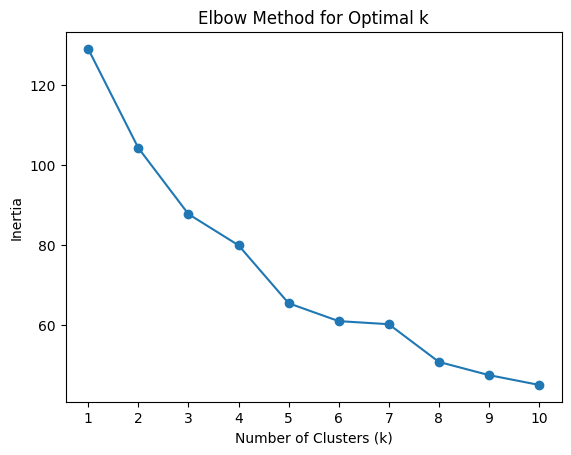

In [20]:
data_for_clustering = cultivar_means.drop('Cultivar', axis=1)

inertia_values = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

As we can see in the inertia plot, k = 5 seems to be the optimal number of clusters.

We implement the K-Means clustering algorithm on the average measurements of each cultivar and assign them to a cluster, labelled from 0 to 4.

In [21]:
data_for_clustering = cultivar_means.drop('Cultivar', axis=1)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(data_for_clustering)

cluster_labels = kmeans.labels_

cultivar_means['Cluster'] = cluster_labels

In order to visualize the clusters we obtained, we need to transform the 8-dimensional data points - the measurements - into a lower dimension. We use PCA to reduce the dimensionality while preserving as much of the variance as possible. We will project the data onto the first 2 principal components. This 2D visualization makes an easier interpretation of the points separation. We assign a different color to points from different clusters.

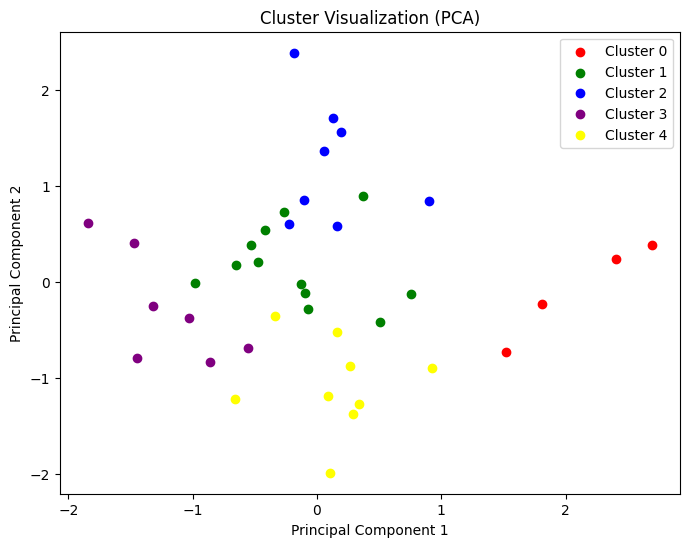

In [22]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(cultivar_means.drop(['Cultivar', 'Cluster'], axis=1))

colors = ['red', 'green', 'blue', 'purple', 'yellow']

plt.figure(figsize=(8, 6))
for cluster_label, color in enumerate(colors):
    cluster_data = principal_components[cultivar_means['Cluster'] == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', color=color)

plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


We can now see the characteristics of the cultivars in each cluster. For this, we will perform descriptive statistics and draw the most important conclusions out of those.

In [27]:
clustering_data.columns

Index(['Cultivar', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'], dtype='object')

In [36]:
cultivar_means

,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY,Cluster
0,0,-0.136321,-0.175936,0.877282,0.455533,-0.105321,0.403874,-0.708722,-0.260914,4
1,1,0.992904,0.309647,0.567852,0.143736,-0.179832,0.652647,-0.533803,-0.298698,4
2,2,-1.943920,-0.772461,-0.466869,-0.334203,-0.084458,0.155101,0.616051,0.350930,2
3,3,-0.505416,-0.673109,0.057104,2.037199,2.621781,0.608497,1.000271,0.777533,0
4,4,0.083514,1.060167,-0.343783,-0.515764,-0.595604,-0.365370,0.191450,0.480101,1
5,5,0.325711,0.453293,0.230161,0.320330,0.237429,0.516799,0.049640,0.093518,1
6,6,0.519552,-0.142818,-0.270543,0.217681,-0.170891,-0.071597,1.319232,-0.553958,1
7,7,-0.300394,0.596525,-0.347152,-0.202849,0.022838,0.245950,0.275783,-0.855667,1
8,8,1.447529,1.281225,-0.250642,-0.002518,-0.038261,0.109252,1.048562,1.056271,1
9,9,-0.717704,0.298884,-0.473544,-0.511356,-0.248382,-0.479143,1.472461,0.251754,2


In [29]:
# create a dictionary mapping cultivars to clusters
cultivar_cluster_map = dict(zip(cultivar_means['Cultivar'], cultivar_means['Cluster']))

# map cluster labels to cultivars in clustering_data
clustering_data['Cluster'] = clustering_data['Cultivar'].map(cultivar_cluster_map)

In [40]:
clustering_data.columns

Index(['Cultivar', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY',
       'Cluster'],
      dtype='object')

In [43]:
# Select numerical columns (excluding 'Cultivar' and 'Cluster')
numerical_columns = clustering_data.select_dtypes(include=['number']).drop(['Cultivar', 'Cluster'], axis=1)

# Group the data by the 'Cluster' column
cluster_groups = clustering_data.groupby('Cluster')

# Perform descriptive statistics for each cluster
for cluster, data in cluster_groups:
    print(f"Cluster {cluster} Descriptive Statistics:")
    print(data[numerical_columns.columns].describe())
    print()

Cluster 0 Descriptive Statistics:
              PH        IFP         NLP         NGP        NGL         NS  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   69.366250  15.441250   78.816250  200.224688   2.839375   5.441875   
std     8.313978   2.827268   21.196878  103.246994   2.325905   2.037547   
min    50.400000   9.000000   44.000000   80.400000   1.550000   0.800000   
25%    64.350000  13.982500   63.800000  159.700000   2.202500   3.950000   
50%    70.400000  15.800000   79.400000  184.700000   2.405000   5.900000   
75%    74.380000  17.547500   91.652500  217.302500   2.525000   6.600000   
max    84.200000  21.200000  123.000000  683.400000  14.860000   9.000000   

              MHG           GY  
count   32.000000    32.000000  
mean   188.693438  3644.873513  
std     10.043892   516.005089  
min    160.080000  3071.425287  
25%    183.785000  3237.866379  
50%    189.095000  3554.642931  
75%    196.142500  3854.159196  
max    2

Some conclusions:
- cultivars in cluster 0 have substantially larger values for the NLP and NGP parameters - number of stems and number of legumes per plant than the rest of the clusters (we saw in the correlation analysis that the Pearson coefficient between NLP and NGP was positive and closer to 1 than to 0 - 0.68 - so we could assume large values for one mean large values for the other)
- cultivars in cluster 0 have larger values for the NS parameter - number of grains per pod - than the rest of the clusters
- cultivars in clusters 0,1,2 have larger values for MHG - thousand seed weight - than clusters 3,4
- cluster 3 has less GY - grain yield - than the rest of the clusters



What we did was cluster cultivars based on the Euclidean distance between the means of all parameters. This yielded clusters which contained similar cultivars in terms of overall characteristics. However, if we wish to highlight a specific characteristc and cluster cultivars based on it, we should filter the dataset and, optionally, redefine the distance metric (e.g. Manhattan distance - summing the absolute differences - or cosine similarity - commonly used when the magnitude of the vectors is not important, only the direction).

---

**TASK 15.1 : Predict MHG based on synthetic data you will create for a new cultivar.**

The task looks ambiguous, there are a couple of questions which need clarification before diving into the implementation:
1. What is the synthetic data created for? A new cultivar? All current cultivars?
2. Should we predict MHG for a new cultivar, for which we create synthetic data beforehand? If so, what do we train the model on? All the real data, plus a portion of the synthetically generated data points, and validate on the rest of the synthetically generated data points?
3. Do we generate synthetic data with the purpose of expanding the training dataset, given the limited real data (real measuremets)? If so, should synthetic data be created for all cultivars?
4. Should we remove data for one existing cultivar from the dataset, keep it for validation, then train the model on the others, in order to validate the prediction accuracy of the model on actual/real observations and not on synthetic data?

One of the most common use cases of synthetic data in machine learning is to supplement or replace real-world data. Usually, real-world data is difficult to obtain in large amounts, it may be incomplete, biased or it can contain errors. In our case, we have relatively few samples of real-world measurements and using larger and more diverse synthetic data for training, which mimics the characteristics of real data, can enhance the performance of a ML model.

In our case, we have real-world measurements for 40 different cultivars, with each having their distinct characteristics and behaviors. For the prediction task at hand, we are asked to predict the value for one variable (MHG) for a new cultivar. This raises the question: what is the new cultivar? Do I create synthetic measurements for a new cultivar, train the model with the existing 40 cultivars and validate it against the synthetic data I generated? If this is the case, the evaluation of the model would not have a meaningful outcome, because I have no domain knowledge or experimental data available to compare my synthetic data with and see if it is realistic or not. Should the properites of the new cultivar be similar to one of the current cultivars? If so, which one? Should it average the properties of more cultivars? Should it have its new, unique properties? If the new cultivar is unique, then how do I create it and check if the prediction of the model (trained on different, real data) is correct?

Taking this into consideration, this is my perspective on the high-level solution to the task:
- we should split the dataset and keep the measurements for 39 cultivars, for the training process
- real data for one cultivar is kept for model validation
- we enhance the limited dataset at our disposal by generating synthetic data which mimics the real data
- we train the ML model on the concatenation of the real and synthetic data
- at the end, we make predictions for a new/unseen cultivar (which we separated at the start from the initial dataset) and validate the accuracy of the predictions against the real values.

---

**SYNTHETIC DATA GENERATION**

We will try to generate synthetic data which mimics the characteristics of the (limited) real data. So, we will try to implement various methods and choose the one which performs best for this task.

**METHOD #1**: Kernel Density Estimation (KDE)

First, we employ the KDE method for synthetic data generation. It is used to estimate the probability density function of a continuous random variable based on a sample of data points. It is a non-parametric method, meaning it does not require any assumptions about the data distribution. The accuracy of the KDE estimation depends only on the *bandwidth* parameter. It controls the smoothness of density estimation. A smaller bandwidth results in a more variable estimate, whereas a larger bandwidth yields a smoother estimate. Once we estimate the probability density function, we can generate synthetic data by sampling from the estimated distribution.

Each cultivar has its own characteristics and behaviours. In the real-world dataset at our disposal, for each cultivar and for each season, there are 4 measurements of 4 different samples of the same kind. These are the same plants in the same conditions, therefore it makes sense to generate more (synthetic) samples similar to the real ones in order to enhance the dataset. We will group the data by Cultivar and Season.  

In [14]:
real_data

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,0,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,0,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,0,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...
315,2,38,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,39,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,39,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,39,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [15]:
# group by "Cultivar", "Season"
groups = real_data.groupby(['Cultivar', 'Season'])

For each group, we will create *num_samples_per_group* artificial samples.

In [16]:
num_samples_per_group = 500

We will estimate the PDF for each group and sample synthetic points.

In [17]:
# apply KDE for each group and save them in a dictionary
kde_models = {}
for (cult, season), group_df in groups:
    kde_models[(cult, season)] = {}
    for col in group_df.columns:
        if col not in ['Cultivar', 'Season']:  # exclude 'Cultivar' and 'Season' columns
            kde = KernelDensity(kernel='tophat', bandwidth=1)
            kde.fit(group_df[col].values.reshape(-1, 1))
            kde_models[(cult, season)][col] = kde

In [18]:
# sample new recordings
synthetic_data = []
for (cult, season), kde_dict in kde_models.items():
    for _ in range(num_samples_per_group):
        sample = {'Cultivar': cult, 'Season': season}
        for col, kde_model in kde_dict.items():
            new_val = kde_model.sample()
            sample[col] = new_val[0][0]
        synthetic_data.append(sample)

# Convert synthetic data to DataFrame
synthetic_data = pd.DataFrame(synthetic_data)

In [19]:
synthetic_data

,Cultivar,Season,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,0,1,57.864178,14.812942,101.663535,177.001093,2.203178,5.770037,147.582111,3312.875410
1,0,1,59.455008,16.193670,101.115091,203.426633,2.078709,4.232858,152.616218,3516.774678
2,0,1,63.489233,13.675237,102.830363,178.496739,2.109727,6.023418,151.632701,3311.768262
3,0,1,60.687126,15.133108,102.768116,203.205719,1.210821,8.031112,148.068377,3391.063387
4,0,1,62.497149,17.638088,100.663476,191.147543,1.073520,7.637875,141.284171,3390.472273
...,...,...,...,...,...,...,...,...,...,...
39995,39,2,65.438928,16.728742,86.589154,206.385781,2.875449,2.734021,148.239029,3651.146535
39996,39,2,64.908886,17.425886,85.447391,205.944870,2.170110,2.939987,146.500607,3652.506942
39997,39,2,62.442153,17.803565,93.925240,270.895168,2.994639,2.989481,156.673221,3487.657608
39998,39,2,61.923714,16.958478,86.676514,168.055296,3.129335,4.242662,147.604328,3604.325816


In [20]:
data = pd.concat([real_data, synthetic_data], ignore_index=True)

In [21]:
data

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,58.800000,15.200000,98.200000,177.800000,1.810000,5.200000,152.200000,3232.820000
1,1,0,58.600000,13.400000,102.000000,195.000000,1.850000,7.200000,141.690000,3517.360000
2,1,0,63.400000,17.200000,100.400000,203.000000,2.020000,6.800000,148.810000,3391.460000
3,1,0,60.270000,15.270000,100.200000,191.930000,1.890000,6.400000,148.500000,3312.580000
4,1,1,81.200000,18.000000,98.800000,173.000000,1.750000,7.400000,145.590000,3230.990000
...,...,...,...,...,...,...,...,...,...,...
40315,2,39,65.438928,16.728742,86.589154,206.385781,2.875449,2.734021,148.239029,3651.146535
40316,2,39,64.908886,17.425886,85.447391,205.944870,2.170110,2.939987,146.500607,3652.506942
40317,2,39,62.442153,17.803565,93.925240,270.895168,2.994639,2.989481,156.673221,3487.657608
40318,2,39,61.923714,16.958478,86.676514,168.055296,3.129335,4.242662,147.604328,3604.325816


In [173]:
data.to_csv('data/synthetic_and_real_data.csv', index=False)

---

Import the dataset from the .csv file.

In [151]:
data = pd.read_csv('data/synthetic_and_real_data.csv')

In [152]:
data

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,58.800000,15.200000,98.200000,177.800000,1.810000,5.200000,152.200000,3232.820000
1,1,0,58.600000,13.400000,102.000000,195.000000,1.850000,7.200000,141.690000,3517.360000
2,1,0,63.400000,17.200000,100.400000,203.000000,2.020000,6.800000,148.810000,3391.460000
3,1,0,60.270000,15.270000,100.200000,191.930000,1.890000,6.400000,148.500000,3312.580000
4,1,1,81.200000,18.000000,98.800000,173.000000,1.750000,7.400000,145.590000,3230.990000
...,...,...,...,...,...,...,...,...,...,...
40315,2,39,63.723098,15.111788,76.123422,206.558435,1.653382,4.558608,155.563949,3488.194705
40316,2,39,58.798580,16.800916,93.298946,168.947103,2.182522,2.591963,146.264889,3488.536937
40317,2,39,61.792374,16.134199,76.158454,271.962621,1.616902,3.739645,147.323891,3604.809229
40318,2,39,62.042762,16.719162,92.291361,207.098565,1.856313,2.741062,146.376739,3418.733494


In [153]:
# numerical_cols = data.select_dtypes(include=['number']).drop(['Cultivar', 'Season'], axis=1).columns
# grouped_data = data.groupby('Cultivar')
# def standardize_group(group_df, numerical_cols):
#     scaler = StandardScaler()
#     group_df[numerical_cols] = scaler.fit_transform(group_df[numerical_cols])
#     return group_df
# # Apply the standardize_group function to each group and concatenate the results
# data_standardized = grouped_data.apply(lambda x: standardize_group(x, numerical_cols))

# # Reset the index of the resulting dataframe
# data_standardized.reset_index(drop=True, inplace=True)

# cultivar = data_standardized['Cultivar'].sample().iloc[0]
# test_data = data_standardized[data_standardized['Cultivar'] == cultivar]
# train_val_data = data_standardized[data_standardized['Cultivar'] != cultivar]

In [154]:
X = data.drop(columns=['MHG'])
y = data['MHG']

# perform PCA
pca = PCA(n_components=5)
X_pca = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# split data into training and (validation + test) sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# split (validation + test) set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [155]:
# cultivar = data['Cultivar'].sample().iloc[0]
# train_val_data = data[data['Cultivar'] != cultivar].reset_index(drop=True)
# test_data = data[data['Cultivar'] == cultivar].reset_index(drop=True)

In [156]:
# X = train_val_data.drop(columns=['MHG'])
# y = train_val_data['MHG']

# X_test = test_data.drop(columns=['MHG'])
# y_test = test_data['MHG']

In [157]:
# # perform PCA
# pca = PCA(n_components=5)
# X_test_pca = pd.DataFrame(pca.fit_transform(X_test), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [158]:
# # perform PCA
# pca = PCA(n_components=5)
# X_pca = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])


# # split (validation + test) set into validation and test sets
# X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [159]:
# model = keras.Sequential([
#     keras.layers.Dense(128, activation=keras.layers.LeakyReLU(negative_slope=0.5), input_dim=X_train.shape[1]),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(64, activation=keras.layers.LeakyReLU(negative_slope=0.5)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(32, activation=keras.layers.LeakyReLU(negative_slope=0.5)),
#     keras.layers.Dense(1)
# ])

In [172]:
# define and train neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='tanh', input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100


/home/andreistoica12/vois_mle_project/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 163/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28522.5645

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 23848.1309 - val_loss: 7296.9648
Epoch 2/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5339.4399 - val_loss: 1692.9784
Epoch 3/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1245.2517 - val_loss: 479.9809
Epoch 4/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 520.2194 - val_loss: 371.1851
Epoch 5/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 494.2629 - val_loss: 367.7499
Epoch 6/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 385.7736 - val_loss: 328.2795
Epoch 7/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 370.1137 - val_loss: 299.8210
Epoch 8/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 312.3092 - val_loss: 255.5159
Epoch 9/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 270.8381 - val_loss: 231.5134
Epoch 10/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 229.0683 - val_loss: 163.9249
Epoch 11/100
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 175.5147 - 

In [173]:
# evaluate model
loss = model.evaluate(X_test, y_test)
print("Test MSE:", loss)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 44.7115
Test MSE: 48.15823745727539


In [174]:
# # test the model
# y_test_pred = model.predict(X_test)
# test_mse = mean_squared_error(y_test, y_test_pred)
# print(f"Test MSE: {test_mse}")

In [175]:
predicted_values = model.predict(X_test)
real_values = y_test

# Printing predicted and real values in parallel
for pred, real in zip(predicted_values, real_values):
    print("Real:", real, "| Predicted:", pred[0])

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
Real: 151.73311865263602 | Predicted: 147.79308
Real: 147.7200110563775 | Predicted: 141.54465
Real: 155.07008045275808 | Predicted: 154.53345
Real: 152.2023671480127 | Predicted: 158.34312
Real: 201.85874474725264 | Predicted: 197.66335
Real: 193.06464317292816 | Predicted: 193.93158
Real: 185.39534381462377 | Predicted: 187.16458
Real: 137.219806494346 | Predicted: 144.21048
Real: 148.1865019277686 | Predicted: 161.60309
Real: 156.1528087963118 | Predicted: 146.14116
Real: 166.78633672829815 | Predicted: 158.20999
Real: 157.70333908214252 | Predicted: 160.75975
Real: 162.4514402947324 | Predicted: 171.85783
Real: 179.44668463306618 | Predicted: 168.67686
Real: 162.39090658068162 | Predicted: 163.9164
Real: 163.4017732052803 | Predicted: 174.19856
Real: 159.23015562729253 | Predicted: 160.07718
Real: 169.5191689546824 | Predicted: 164.03079
Real: 141.03955870850632 | Predicted: 146.93208
Real: 161.13055542064757 | Predicted: 172.25992
Real: 1

In [48]:
X = data.drop(columns=['MHG'])
y = data['MHG']

# perform PCA
pca = PCA(n_components=5)  # Specify the number of principal components
X_pca = pca.fit_transform(X)

# split data into training and (validation + test) sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# split (validation + test) set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


# define and train neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# # evaluate model
# loss = model.evaluate(X_val, y_val)
# print("Mean Squared Error:", loss)

# validate the model
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")

# test the model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")


Epoch 1/50


/home/andreistoica12/vois_mle_project/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 11478.5625 - val_loss: 3239.8521
Epoch 2/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3380.8901 - val_loss: 2124.8608
Epoch 3/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2549.0388 - val_loss: 1603.2347
Epoch 4/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2033.9633 - val_loss: 1259.7463
Epoch 5/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1606.7915 - val_loss: 811.3112
Epoch 6/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1095.0100 - val_loss: 448.2125
Epoch 7/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 734.8155 - val_loss: 386.2191
Epoch 8/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 593.9389 - val_loss: 265.3383
Epoch 9/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 535.0616 - val_loss: 234.9720
Epoch 10/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 491.7670 - val_loss: 217.9748
Epoch 11/50
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 449.9531 - val_l

In [59]:
predicted_values = model.predict(X_test)
real_values = y_test

# Printing predicted and real values in parallel
for pred, real in zip(predicted_values, real_values):
    print("Real:", real, "| Predicted:", pred[0])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
Real: 187.87 | Predicted: 70962.62
Real: 187.38 | Predicted: 71888.56
Real: 177.1 | Predicted: 69248.83
Real: 180.0 | Predicted: 69798.37
Real: 200.86 | Predicted: 57302.926
Real: 194.93 | Predicted: 58878.098
Real: 191.06 | Predicted: 59076.33
Real: 191.75 | Predicted: 56119.1
Real: 176.30746486647195 | Predicted: 69333.945
Real: 180.839145637925 | Predicted: 69826.01
Real: 180.24634630585425 | Predicted: 71865.52
Real: 176.80651799136507 | Predicted: 71894.74
Real: 187.24577839586533 | Predicted: 69363.055
Real: 187.73651170874604 | Predicted: 70941.4
Real: 180.35375490105136 | Predicted: 70856.22
Real: 188.36558716589727 | Predicted: 69315.84
Real: 179.99315228478076 | Predicted: 69838.37
Real: 176.6642960502206 | Predicted: 69810.82
Real: 177.11821269510293 | Predicted: 69285.555
Real: 179.10386454321352 | Predicted: 69806.38
Real: 179.77611514471522 | Predicted: 69730.65
Real: 186.82236271732756 | Predicted: 69271.414
Real: 187.833093746682

It is good practice to standardize/normalize the features considered before feeding them to any ML model. As we saw previously, some variables may have a different range than others. Some ML algorithms are sensitive to the scale of  the features. Features with larger scales can dominate the optimization process. This leads to biased parameter estimates.

In [4]:
numerical_cols = data.select_dtypes(include=['number']).drop(['Cultivar', 'Season'], axis=1).columns

In [5]:
numerical_cols

Index(['PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY'], dtype='object')

In [7]:
grouped_data = data.groupby('Cultivar')

In [8]:
def standardize_group(group_df, numerical_cols):
    scaler = StandardScaler()
    group_df[numerical_cols] = scaler.fit_transform(group_df[numerical_cols])
    return group_df

In [9]:
# Apply the standardize_group function to each group and concatenate the results
data_standardized = grouped_data.apply(lambda x: standardize_group(x, numerical_cols))

# Reset the index of the resulting dataframe
data_standardized.reset_index(drop=True, inplace=True)

/tmp/ipykernel_16390/668936897.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_standardized = grouped_data.apply(lambda x: standardize_group(x, numerical_cols))


In [59]:
data_standardized

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,-1.051090,0.186378,0.865782,0.423437,-0.606539,0.276923,-0.239798,-0.447503
1,1,0,-1.076019,-1.136571,1.020674,0.910863,-0.545712,1.307708,-1.422987,1.892154
2,1,0,-0.477741,1.656321,0.955456,1.137573,-0.287199,1.101551,-0.621435,0.856929
3,1,0,-0.867868,0.237826,0.947304,0.823863,-0.484886,0.895394,-0.656334,0.208331
4,2,0,1.142594,0.774355,-1.530965,-1.798318,0.473134,-1.475412,0.915247,-1.645245
...,...,...,...,...,...,...,...,...,...,...
40315,2,39,-0.411440,0.164154,0.371177,0.934688,-0.678557,2.048068,0.255344,-0.962303
40316,2,39,-1.939692,1.092079,0.932092,0.422530,0.156218,-0.535109,-1.696887,-0.959792
40317,2,39,-1.010612,0.725817,0.372321,1.825305,-0.736108,0.972365,-1.474561,-0.106553
40318,2,39,-0.932908,1.047167,0.899187,0.942043,-0.358412,-0.339270,-1.673405,-1.472029


In [19]:
data

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,0,58.800000,15.200000,98.200000,177.800000,1.810000,5.200000,152.200000,3232.820000
1,1,0,58.600000,13.400000,102.000000,195.000000,1.850000,7.200000,141.690000,3517.360000
2,1,0,63.400000,17.200000,100.400000,203.000000,2.020000,6.800000,148.810000,3391.460000
3,1,0,60.270000,15.270000,100.200000,191.930000,1.890000,6.400000,148.500000,3312.580000
4,1,1,81.200000,18.000000,98.800000,173.000000,1.750000,7.400000,145.590000,3230.990000
...,...,...,...,...,...,...,...,...,...,...
40315,2,39,63.723098,15.111788,76.123422,206.558435,1.653382,4.558608,155.563949,3488.194705
40316,2,39,58.798580,16.800916,93.298946,168.947103,2.182522,2.591963,146.264889,3488.536937
40317,2,39,61.792374,16.134199,76.158454,271.962621,1.616902,3.739645,147.323891,3604.809229
40318,2,39,62.042762,16.719162,92.291361,207.098565,1.856313,2.741062,146.376739,3418.733494


In [24]:
# scaler = StandardScaler()
# data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [20]:
# data_standardized

Then, we will remove the measurements for one Cultivar (for now, we choose it randomly).

In [26]:
cultivar = data_standardized['Cultivar'].sample().iloc[0]
data_val = data_standardized[data_standardized['Cultivar'] == cultivar]
data_train_test = data_standardized[data_standardized['Cultivar'] != cultivar]

In [27]:
data_train_test

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,-1.0,-1.689278,-1.071845,-0.087761,1.951992,0.707189,-0.573250,0.766421,-0.822782,-0.369828
1,-1.0,-1.689278,-1.094206,-0.683872,2.141643,0.991957,-0.525563,2.124909,-1.359147,0.196740
2,-1.0,-1.689278,-0.557544,0.574585,2.061790,1.124408,-0.322893,1.853211,-0.995786,-0.053948
3,-1.0,-1.689278,-0.907493,-0.064579,2.051808,0.941129,-0.477876,1.581514,-1.011607,-0.211012
4,-1.0,-1.602648,1.432575,0.839523,1.981937,0.627719,-0.644781,2.260758,-1.160115,-0.373472
...,...,...,...,...,...,...,...,...,...,...
315,1.0,1.602648,2.229741,0.286465,0.830556,0.064804,-0.537485,-0.272823,-1.690866,-0.138631
316,1.0,1.689278,-0.445740,0.375881,0.844031,0.544937,-0.096380,-0.320370,-1.155012,0.000591
317,1.0,1.689278,-0.423379,0.707054,2.880284,2.253548,0.034759,-0.184521,-1.075909,0.464007
318,1.0,1.689278,-1.071845,-0.220230,1.363076,0.753546,-0.239441,-1.271311,-0.612523,0.138142


In [77]:
# shuffled_data = data_standardized.sample(frac=1, random_state=42)  # frac=1 shuffles the entire dataset

In [78]:
# from sklearn.model_selection import train_test_split

# # Split the dataset into training and testing sets
# train_data, test_data = train_test_split(shuffled_data, test_size=0.2, random_state=42)

# # Further split the training data into training and validation sets
# train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 for validation set

In [28]:
train_data, test_data = train_test_split(data_train_test, test_size=0.2, random_state=42)

In [29]:
X_train = train_data.drop(columns=['MHG'])
y_train = train_data['MHG']

X_val = data_val.drop(columns=['MHG'])
y_val = data_val['MHG']

X_test = test_data.drop(columns=['MHG'])
y_test = test_data['MHG']

In [30]:
from keras.layers import LeakyReLU

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1),
])

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1482 - val_loss: 1.1951
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0823 - val_loss: 0.8835
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0210 - val_loss: 0.7471
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9242 - val_loss: 0.6691
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9218 - val_loss: 0.6654
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8898 - val_loss: 0.6509
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8693 - val_loss: 0.6467
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8271 - val_loss: 0.5970
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7797 - val_loss: 0.6084
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8457 - val_loss: 0.6031
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8088 - val_loss: 0.5658
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7573 - val_loss: 0.5122
Epoch 13/50
8/8 ━━━━━━━

In [33]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6601 
Test Loss: 0.6779287457466125


In [34]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Mean Squared Error: 0.5185817238799355


In [35]:
for elem1, elem2 in zip(y_pred, y_val):
    print(elem1, elem2)

[0.0295151] 1.018005240213664
[0.540585] 0.8006014773308622
[-0.06109059] 0.6867962211739036
[0.16592501] 0.8353044253966617
[0.26669905] 1.0032054535385426
[0.45987684] 1.4186201553850217
[0.5607695] 1.2379606904542442
[0.58178085] 1.001674441123875


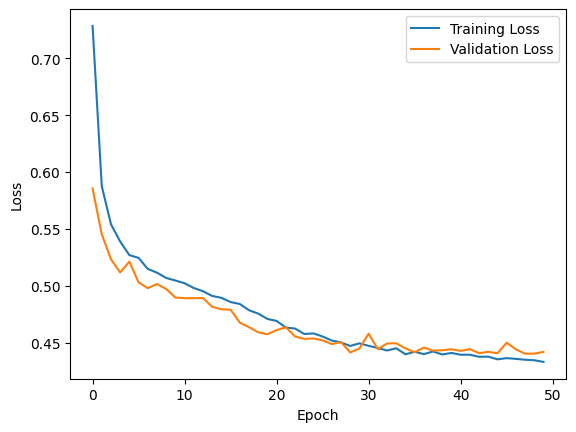

In [94]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
# from sklearn.linear_model import LinearRegression

# X_val = data_val.drop(columns=['Season', 'Cultivar', 'MHG'])
# y_val = data_val['MHG']

# X = data_train_test.drop(columns=['Season', 'Cultivar', 'MHG'])
# y = data_train_test['MHG']

# # Step 3: Choose a model
# model = LinearRegression()

# # Step 4: Train the model
# model.fit(X_train, y_train)

# # Step 5: Predict on validation set
# y_pred = model.predict(X_val)

# # Step 6: Evaluate the model
# mse = mean_squared_error(y_val, y_pred)
# print("Mean Squared Error:", mse)

Mean Squared Error: 1.3755412542275691


In [42]:
# from sklearn.tree import DecisionTreeRegressor

# X = data_train_test.drop(columns='MHG')
# y = data_train_test['MHG']

# # Step 2: Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Train the Decision Tree model
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train, y_train)

# # Step 4: Make predictions
# y_pred = dt_model.predict(X_test)

# # Step 5: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

Mean Squared Error: 0.7434725447517169


In [45]:
# # X_val = data_val.drop(columns=['Season', 'Cultivar', 'MHG'])
# X_val = data_val.drop(columns='MHG')
# y_val = data_val['MHG']

In [46]:
# # X = data_train_test.drop(columns=['Season', 'Cultivar', 'MHG'])
# X = data_train_test.drop(columns='MHG')
# y = data_train_test['MHG']

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# from keras.layers import LeakyReLU

# model = keras.Sequential([
#     keras.layers.Input(shape=(X_train.shape[1],)),
#     keras.layers.Dense(64, activation=LeakyReLU(negative_slope=0.1)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(16, activation=LeakyReLU(negative_slope=0.1)),
#     keras.layers.Dense(1),
# ])

In [55]:
# model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

In [41]:
# y_pred = model.predict(X_val)
# mse = mean_squared_error(y_val, y_pred)
# print("Mean Squared Error:", mse)

In [37]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [40]:
# y_pred = model.predict(X_val)

In [38]:
# y_pred

In [39]:
# y_val.head(50)

In [326]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.35673878462155
Mean Squared Error (MSE): 0.18481197568802915


---

**TESTS**

**METHOD #2**: Generative Adversarial Networks (GANs)

This method is used to generate synthetic data primarily in the fields of computer vision or medical imaging. For good results, however, it requires large datasets to train on. However, I tried to create a synthetic dataset with this method as well, albeit with worse results than the more straightforward KDe method.

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
import torch.nn.init as init
from torch.utils.data import Dataset

In [52]:
# defining a single generation block function
def FC_Layer_blockGen(input_dim, output_dim):
    single_block = nn.Sequential(
        nn.Linear(input_dim, output_dim),

        nn.ReLU()
    )
    return single_block

In [53]:
# DEFINING THE GENERATOR
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Tanh()  
        )

    def forward(self, x):
        return self.model(x)

In [54]:
#defining a single discriminattor block       
def FC_Layer_BlockDisc(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.ReLU(),
        nn.Dropout(0.4)
    )

In [55]:
# Defining the discriminator

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [56]:
numerical_features = ['Season', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']
real_data_original_scale = X[numerical_features]

In [57]:
#Defining training parameters
batch_size = 128
num_epochs = 500
lr = 0.0002
num_features = len(numerical_features)
latent_dim = 9

In [58]:
# MODEL INITIALIZATION
generator = Generator(num_features, num_features)
discriminator = Discriminator(num_features)

In [59]:
# LOSS FUNCTION AND OPTIMIZERS
criterion = nn.BCELoss()
gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr)

In [60]:
X_ndarray = real_data_original_scale.values
X_normalized = torch.FloatTensor((X_ndarray - X_ndarray.min(axis=0)) / (X_ndarray.max(axis=0) - X_ndarray.min(axis=0)) * 2 - 1)
real_data = X_normalized

In [61]:
#Creating a dataset
class MyDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe.values.astype(float)
        self.labels = dataframe.values.astype(float)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {
            'input': torch.tensor(self.data[idx]),
            'label': torch.tensor(self.labels[idx])
        }
        return sample

In [62]:
# Create an instance of the dataset
dataset = MyDataset(real_data_original_scale)

In [63]:
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

def weights_init(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0)

pretrained = False
if pretrained:
    pre_dict = torch.load('pretrained_model.pth')
    generator.load_state_dict(pre_dict['generator'])
    discriminator.load_state_dict(pre_dict['discriminator'])
else:
    # Apply weight initialization
    generator = generator.apply(weights_init)
    discriminator = discriminator.apply(weights_init)

In [64]:
model_save_freq = 100

latent_dim = 9
for epoch in range(num_epochs):
    for batch in dataloader:
        real_data_batch = batch['input'].float()
        # Train discriminator on real data
        real_labels = torch.FloatTensor(np.random.uniform(0.9, 1.0, (batch_size, 1)))
        disc_optimizer.zero_grad()
        output_real = discriminator(real_data_batch)
        loss_real = criterion(output_real, real_labels)
        loss_real.backward()

        # Train discriminator on generated data
        fake_labels = torch.FloatTensor(np.random.uniform(0, 0.1, (batch_size, 1)))
        noise = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim)))
        generated_data = generator(noise)
        output_fake = discriminator(generated_data.detach())
        loss_fake = criterion(output_fake, fake_labels)
        loss_fake.backward()

        disc_optimizer.step()

        # Train generator 
        valid_labels = torch.FloatTensor(np.random.uniform(0.9, 1.0, (batch_size, 1)))
        gen_optimizer.zero_grad()
        output_g = discriminator(generated_data)
        loss_g = criterion(output_g, valid_labels)
        loss_g.backward()
        gen_optimizer.step()

    # Print progress
    # print(f"Epoch {epoch}, D Loss Real: {loss_real.item()}, D Loss Fake: {loss_fake.item()}, G Loss: {loss_g.item()}")

In [65]:
# Generate synthetic data 
synthetic_data = generator(torch.FloatTensor(np.random.normal(0, 1, (real_data.shape[0], num_features))))

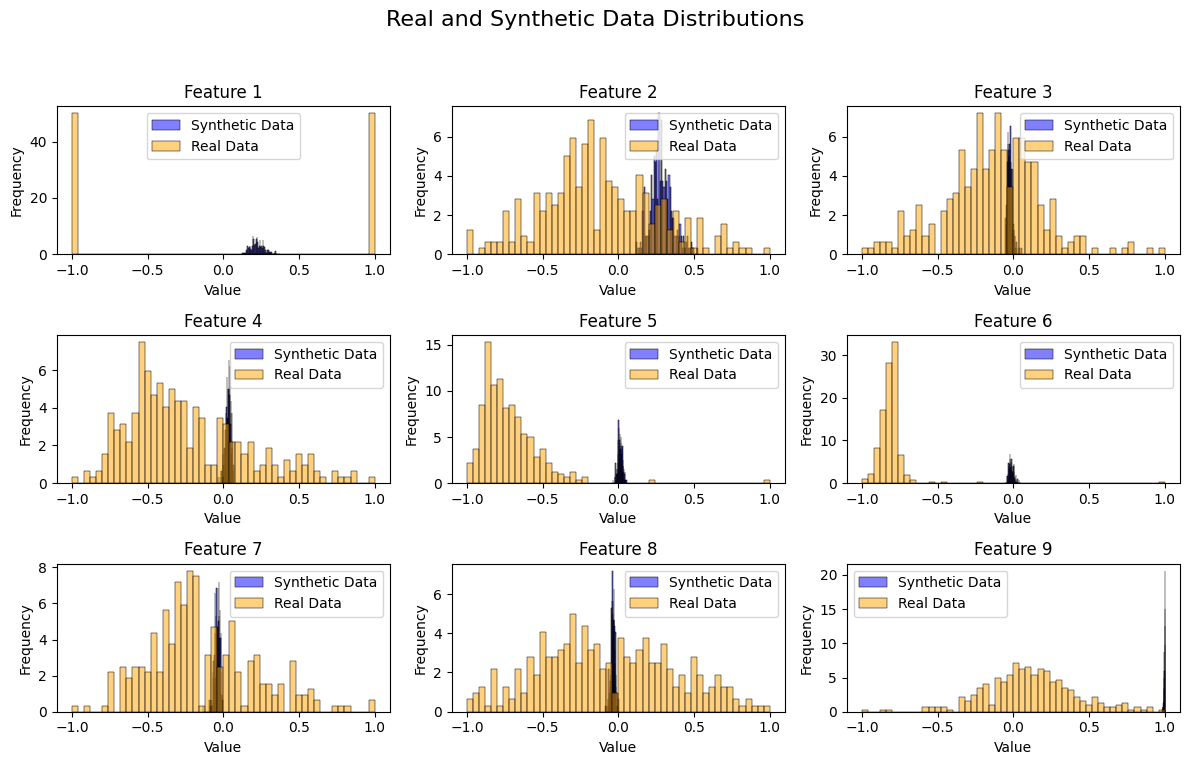

In [66]:
# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle('Real and Synthetic Data Distributions', fontsize=16)

for i in range(3):
    for j in range(3):
        sns.histplot(synthetic_data[:, i * 3 + j].detach().numpy(), bins=50, stat='percent', alpha=0.5, label='Synthetic Data', ax=axs[i, j], color='blue')
        sns.histplot(real_data[:, i * 3 + j].numpy(), bins=50, stat='percent', alpha=0.5, label='Real Data', ax=axs[i, j], color='orange')
        axs[i, j].set_title(f'Feature {i * 3 + j + 1}', fontsize=12)
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Frequency')
        axs[i, j].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---